In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [4]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [8]:
len(y_train)

60000

In [7]:
len(y_test)

10000

In [11]:
X_train[89].shape

(28, 28)

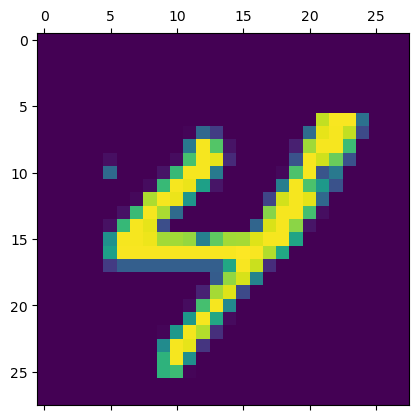

In [13]:
plt.matshow(X_train[89])

In [14]:
y_train[89]

4

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 497us/step - loss: 0.4724 - accuracy: 0.8761
Epoch 2/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.3037 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.2838 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 1s 480us/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.2584 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.2556 - accuracy: 0.9286
Epoch 9/10
1875/1875 [==============================] - 1s 491us/step - loss: 0.2531 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 1s 479u

In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 457us/step - loss: 0.2646 - accuracy: 0.9273


[0.26461076736450195, 0.927299976348877]

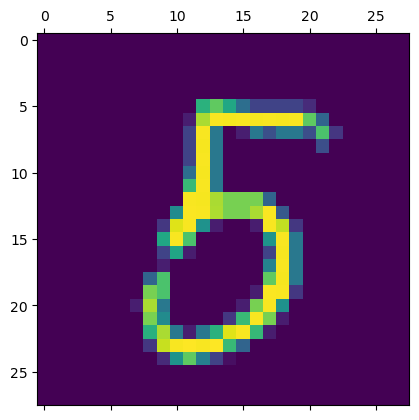

In [48]:
plt.matshow(X_test[45])

In [49]:
y_predicted = model.predict(X_test_flattened)
y_predicted[45]

313/313 [==============================] - 0s 375us/step


array([1.1242621e-01, 8.1433245e-05, 1.5727216e-02, 6.8011862e-01,
       3.5486728e-02, 9.8603886e-01, 3.8087673e-03, 1.0581129e-04,
       7.3921818e-01, 2.3004046e-01], dtype=float32)

In [50]:
np.argmax(y_predicted[45])

5

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[45]

5

In [56]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    3,    0,    6,    6,    2,    4,    1],
       [   0, 1106,    4,    3,    0,    1,    3,    2,   16,    0],
       [   3,    5,  933,   17,    7,    4,   10,    9,   40,    4],
       [   1,    0,   17,  929,    1,   19,    2,    9,   23,    9],
       [   1,    1,    6,    2,  909,    0,    8,    4,    9,   42],
       [   7,    2,    5,   42,   12,  761,   10,    8,   39,    6],
       [  10,    3,   10,    1,    9,   11,  908,    2,    4,    0],
       [   1,    6,   25,    4,    7,    0,    0,  946,    3,   36],
       [   4,    6,    6,   18,    9,   17,    6,    9,  889,   10],
       [   9,    5,    1,    8,   25,    3,    0,   12,   11,  935]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

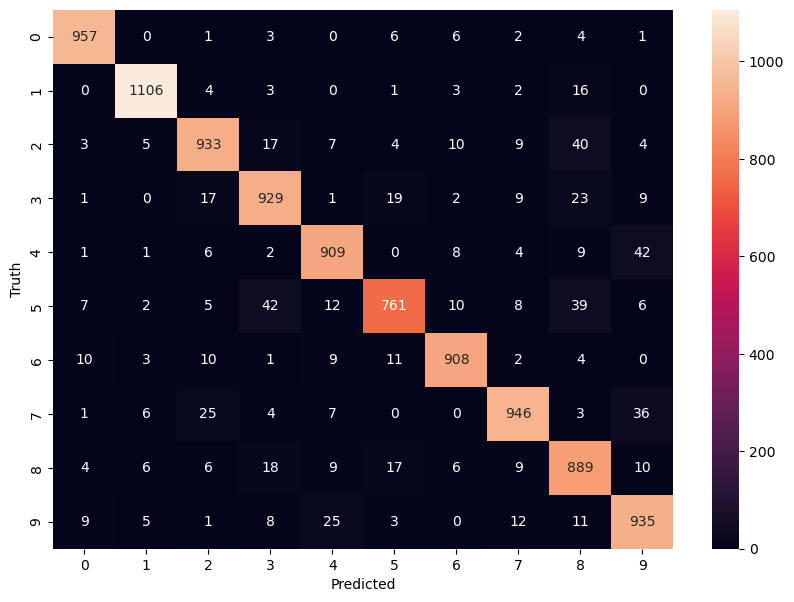

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# with Hidden Layer

In [58]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 757us/step - loss: 0.2805 - accuracy: 0.9204
Epoch 2/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.1273 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.0884 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 1s 736us/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 1s 737us/step - loss: 0.0527 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.0414 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.0343 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.0271 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.0232 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 804u

In [59]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 529us/step - loss: 0.0827 - accuracy: 0.9769


[0.08266730606555939, 0.9768999814987183]

313/313 [==============================] - 0s 465us/step


Text(95.72222222222221, 0.5, 'Truth')

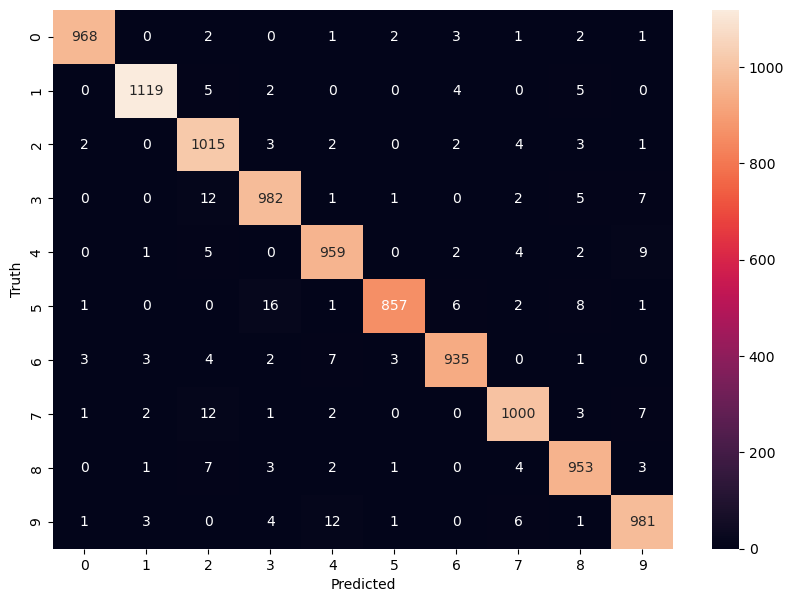

In [60]:
y_predicted = model.predict(X_test_flattened)

# convert into lables
y_predicted_labels = [np.argmax(i) for i in y_predicted]


# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)


# plot cm
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 784us/step - loss: 0.2680 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.1214 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0873 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.0668 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.0527 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.0416 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.0349 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0284 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.0233 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 1s 783u

In [65]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[45]

313/313 [==============================] - 0s 474us/step


5